In [3]:
from imctools.converters import exportacquisitioncsv
from imctools.io.imc.imcwriter import ImcWriter
from imctools.io.mcd.mcdparser import McdParser


In [4]:
import numpy as np
import pandas as pd
from pathlib import Path
import re
import os
import logging
import skimage
from skimage.io import imread, imsave
from skimage.measure import label, regionprops

In [5]:
working_dir = Path("analysis")

# Output directories
mcd_dir = working_dir / "raw"
img_dir = working_dir / "img"
masks_dir = working_dir / "masks"
segstack_dir = working_dir / "segstacks"
# Create directories (if they do not already exist)
img_dir.mkdir(exist_ok=True)
masks_dir.mkdir(exist_ok=True)
segstack_dir.mkdir(exist_ok=True)

## Load panel
### Requirements:
1) Make sure there is a single Metal Tag per row. Merge duplicates.
2) Add the missing channels (eg: Xenon, When applicable)
3) The order of the panel channels MUST BE IDENTICAL to the order of channels of the mcd files
4) Add a "Segmentation" column that indicates which markers are used for cell and nuclear

In [6]:
panel_file = "Panel_thyroid_V6.csv"
panel = pd.read_csv(panel_file, sep=',') #sorting the panel might be wise before or after loading
panel

,Tube Number,Metal Tag,Target,Antibody Clone,Stock Concentration,Final Concentration / Dilution,uL to add,Unnamed: 7,Segmentation
0,2659.0,Y89,Myeloperoxidase MPO,Polyclonal MPO,500.0,5 ug/mL,1.000000,89,NaN
1,2625.0,In113,Histone H3,D1H2,500.0,0.5 ug/mL,0.100000,113,nuc
2,2621.0,In115,SMA,1A4,500.0,0.5 ug/mL,0.100000,115,NaN
3,NaN,I127,Iodine,NaN,NaN,NaN,NaN,127,NaN
4,NaN,Xe131,Xenon_1,NaN,NaN,NaN,NaN,131,NaN
5,NaN,Xe134,Xenon_2,NaN,NaN,NaN,NaN,134,NaN
6,2984.0,La139,Thyroglobulin (TG),EPR9730,500.0,0.5 ug/mL,0.100000,139,NaN
7,2179.0,Pr141,CCR7,EPR23192-57,500.0,5 ug/mL,1.000000,141,NaN
8,2138.0,Nd142,CD38,EPR4106,500.0,5 ug/mL,1.000000,142,NaN
9,2272.0,Nd143,HLA-DR,TAL 1B5,500.0,1 ug/mL,0.200000,143,cyto


## Export tiffs and metadata

In [7]:
%%time
for f in mcd_dir.glob('*.mcd'):
    if not f.name.startswith("."):
        print(f.name)
        McdParser(f)
        ImcWriter(img_dir, McdParser(f)).write_imc_folder(create_zip=False)
exportacquisitioncsv.export_acquisition_csv(img_dir,output_folder=img_dir)

B20_21851_Thy_v6_RC_T5.mcd
B20_21851_Thy_v6_RC_T4.mcd
B20_21851_Thy_v6_RC_T3.mcd
B20_21851_Thy_v6_RC_T2.mcd
B20_21851_Thy_v6_RC_T1.mcd
B20_21851_Thy_v6_RC_N2.mcd
B20_21851_Thy_v6_RC_N3.mcd
B20_21851_Thy_v6_RC_N1.mcd
B20_21851_Thy_v6_RC_N4.mcd
B20_21851_Thy_v6_RC_N5.mcd
B20_21851_Thy_v6_RC_q2.mcd
B20_21851_Thy_v6_RC_q1.mcd
CPU times: user 6.74 s, sys: 8.86 s, total: 15.6 s
Wall time: 24.7 s


In [6]:
for f in mcd_dir.glob('*.mcd'):
    print(f)

analysis/raw/B20_21851_Thy_v6_RC_T5.mcd
analysis/raw/B20_21851_Thy_v6_RC_T4.mcd
analysis/raw/B20_21851_Thy_v6_RC_T3.mcd
analysis/raw/B20_21851_Thy_v6_RC_T2.mcd
analysis/raw/B20_21851_Thy_v6_RC_T1.mcd
analysis/raw/B20_21851_Thy_v6_RC_N2.mcd
analysis/raw/B20_21851_Thy_v6_RC_N3.mcd
analysis/raw/B20_21851_Thy_v6_RC_N1.mcd
analysis/raw/B20_21851_Thy_v6_RC_N4.mcd
analysis/raw/B20_21851_Thy_v6_RC_N5.mcd
analysis/raw/B20_21851_Thy_v6_RC_q2.mcd
analysis/raw/B20_21851_Thy_v6_RC_q1.mcd


In [28]:
import pandas as pd 

List_files = Path("analysis/img/")
List_files = List_files.rglob("*.tiff")
List_files = list(List_files)
N_files = len(List_files)
List_files = [str(item) for item in List_files]

List_files = np.array(List_files)

List_files = pd.DataFrame(List_files)
List_files.to_csv("Sample_list.csv")


## Check acquisition metadata
If you find the column AcSession seems wrong, manually delete the img folder and run everything above again

In [7]:
aq_session = pd.read_csv(img_dir/'acquisition_metadata.csv', sep=',')
aq_session

,AcSession,ablation_distance_between_shots_x,ablation_distance_between_shots_y,ablation_frequency,ablation_power,description,end_timestamp,has_after_ablation_image,has_before_ablation_image,id,...,roi_end_x_pos_um,roi_end_y_pos_um,roi_start_x_pos_um,roi_start_y_pos_um,segment_data_format,signal_type,slide_id,source_path,start_timestamp,template
0,B22_04111_Thy6_RC_N1,1.0,1.0,800.0,1.0,N1,2023-10-12T17:17:31.580243+02:00,False,False,2,...,0.0,0.0,16471.153,10727.930,Float,Dual,0,analysis/raw/B22_04111_Thy6_RC_N1.mcd,2023-10-12T16:50:43.702408+02:00,Panel thyroid_V6
1,B22_04111_Thy6_RC_T3,1.0,1.0,800.0,1.0,T3,2023-10-12T18:38:31.467952+02:00,False,False,5,...,0.0,0.0,32859.470,14083.096,Float,Dual,0,analysis/raw/B22_04111_Thy6_RC_T3.mcd,2023-10-12T18:11:44.190585+02:00,Panel thyroid_V6
2,B22_04111_Thy6_RC_T4,1.0,1.0,800.0,1.0,T4,2023-10-12T19:59:31.326197+02:00,False,False,8,...,0.0,0.0,32078.249,9152.707,Float,Dual,0,analysis/raw/B22_04111_Thy6_RC_T4.mcd,2023-10-12T19:32:44.372899+02:00,Panel thyroid_V6
3,B22_04111_Thy6_RC_T5,1.0,1.0,800.0,1.0,T5,2023-10-12T20:53:22.288696+02:00,False,False,10,...,0.0,0.0,31277.018,15939.055,Float,Dual,0,analysis/raw/B22_04111_Thy6_RC_T5.mcd,2023-10-12T20:26:35.860638+02:00,Panel thyroid_V6
4,B22_04111_Thy6_RC_T2,1.0,1.0,800.0,1.0,T2,2023-10-12T17:44:30.998285+02:00,False,False,3,...,0.0,0.0,24093.132,11099.085,Float,Dual,0,analysis/raw/B22_04111_Thy6_RC_T2.mcd,2023-10-12T17:17:43.302508+02:00,Panel thyroid_V6
5,B22_04111_Thy6_RC_N2,1.0,1.0,800.0,1.0,N2,2023-10-12T18:11:31.840219+02:00,False,False,4,...,0.0,0.0,25223.571,15607.034,Float,Dual,0,analysis/raw/B22_04111_Thy6_RC_N2.mcd,2023-10-12T17:44:43.004544+02:00,Panel thyroid_V6
6,B22_04111_Thy6_RC_N5,1.0,1.0,800.0,1.0,N5,2023-10-12T20:26:22.941526+02:00,False,False,9,...,0.0,0.0,35935.077,16696.427,Float,Dual,0,analysis/raw/B22_04111_Thy6_RC_N5.mcd,2023-10-12T19:59:43.788496+02:00,Panel thyroid_V6
7,B22_04111_Thy6_RC_N4,1.0,1.0,800.0,1.0,N4,2023-10-12T19:32:32.158989+02:00,False,False,7,...,0.0,0.0,26310.773,8259.307,Float,Dual,0,analysis/raw/B22_04111_Thy6_RC_N4.mcd,2023-10-12T19:05:44.393503+02:00,Panel thyroid_V6
8,B22_04111_Thy6_RC_N3,1.0,1.0,800.0,1.0,N3,2023-10-12T19:05:31.898745+02:00,False,False,6,...,0.0,0.0,29443.171,7692.813,Float,Dual,0,analysis/raw/B22_04111_Thy6_RC_N3.mcd,2023-10-12T18:38:44.254264+02:00,Panel thyroid_V6
9,B22_04111_Thy6_RC_T1,1.0,1.0,800.0,1.0,T1,2023-10-12T16:50:31.688505+02:00,False,False,1,...,0.0,0.0,18324.037,15211.654,Float,Dual,0,analysis/raw/B22_04111_Thy6_RC_T1.mcd,2023-10-12T16:23:43.235358+02:00,Panel thyroid_V6


## Create and export segmentation stacks
- This section creates 2-channel stacks that are used as an input for Cellpose
- The first channel corresponds to cell markers and the second channel is the nuclei


In [10]:
from skimage import exposure

for f in list(img_dir.rglob("*.tiff")):
    img = imread(str(f))
    
    Nuclear_img = exposure.equalize_hist(np.sum(img[panel["Segmentation"].values == "nuc"],axis=0))
    Cytoplasmic_img = exposure.equalize_hist(np.sum(img[panel["Segmentation"].values == "cyto"],axis=0))
    segstack = np.stack((Cytoplasmic_img,Nuclear_img), axis=0)
    skimage.io.imsave(str(segstack_dir/f.name), segstack)


In [2]:
img_dir.rglob

NameError: name 'img_dir' is not defined

## Segmentation using Cellpose

In [1]:
#best parameters for IMC, tested by R.Casanova. Feel free to adapt them for your experiment.

from cellpose import models,core
Model_Choice = "tissuenet" #@param ["cyto", "nuclei", "cyto2", "tissuenet", "livecell"]
#see documentation: https://cellpose.readthedocs.io/en/latest/models.html --> Other built-in models
diameter = 5
flow_threshold = 1
cellprob_threshold=-6
average_models = True #set to true for better predictions, slower
use_GPU = False


# Define output directory for masks


In [24]:
segmentation_type = "whole-cell" # Segmentation type ("nuclei" or "whole-cell")


masks_subdir = masks_dir / segmentation_type
masks_subdir.mkdir(exist_ok=True, parents=True)

<timed exec>:14: UserWarning: analysis/masks/whole-cell/B18_79063_Thy6_RC_N1_s0_a2_ac.ome.tiff is a low contrast image


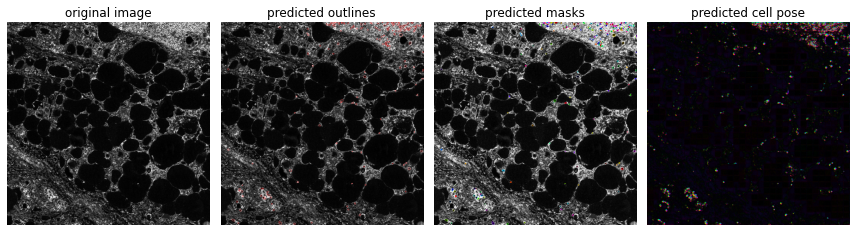

In [ ]:
%%time
from cellpose import plot
import matplotlib.pyplot as plt


model = models.CellposeModel(gpu=use_GPU, model_type=Model_Choice,net_avg=average_models)

files = sorted(Path(segstack_dir).glob("*.tiff"))
    
for f in files:
    
    img = imread(f)
    masks, flows, styles = model.eval(img, diameter=diameter, flow_threshold=flow_threshold,cellprob_threshold=cellprob_threshold)
    mask_file = masks_subdir / f"{f.stem}.tiff"
    imsave(str(mask_file), masks)
    

    fig = plt.figure(figsize=(12,5))
    plot.show_segmentation(fig, img, masks, flows[0])
    plt.tight_layout()
    plt.show()

    

### Measure cell properties

In [ ]:
intensities_dir = working_dir / "intensities"
regionprops_dir = working_dir / "regionprops"

In [ ]:
segmentation_type = "whole-cell"
mask_files = sorted(Path(masks_dir/segmentation_type).glob("*.tiff"))

#img_files = sorted(Path(img_dir).rglob(f.name))#note the rglob for recurrent subfolders

intensities_dir.mkdir(exist_ok=True)
regionprops_dir.mkdir(exist_ok=True)

for f in mask_files:
    img_file = sorted(Path(img_dir).rglob(f.name))[0]
    img = imread(img_file)
    img = np.moveaxis(img, 0, -1)
    labeled_image = label(imread(f))
    
    cell_intensities = skimage.measure.regionprops_table(np.squeeze(labeled_image),intensity_image=img,
                                                   properties=['mean_intensity'])
    cell_intensities_file = Path(intensities_dir) / f"{f.name.replace('.tiff', '.csv')}"
    cell_intensities = pd.DataFrame(cell_intensities)
    cell_intensities.columns = panel["Target"]# chose here the column to indicate the panels eg: panel["Metal Tag"]
    
    pd.DataFrame(cell_intensities).to_csv(cell_intensities_file)
    
    cell_properties = skimage.measure.regionprops_table(np.squeeze(labeled_image),intensity_image=img,
                                                   properties=['area', 'centroid'])
    cell_properties_file = Path(regionprops_dir) / f"{f.name.replace('.tiff', '.csv')}"
    pd.DataFrame(cell_properties).to_csv(cell_properties_file)